In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
96295,2020-04-28,Livingston,Kentucky,21139.0,4,0
405376,2020-08-06,Matanuska-Susitna Borough,Alaska,2170.0,329,2
187354,2020-05-28,Charlotte,Virginia,51037.0,23,0
168085,2020-05-22,Rockland,New York,36087.0,12905,450
277694,2020-06-27,Geneva,Alabama,1061.0,60,0
48633,2020-04-11,Solano,California,6095.0,126,2
120975,2020-05-06,St. Thomas,Virgin Islands,78030.0,37,0
110637,2020-05-03,Whitley,Kentucky,21235.0,11,0
429654,2020-08-13,McKinley,New Mexico,35031.0,4087,230
496830,2020-09-03,St. Mary,Louisiana,22101.0,1774,71


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
299437,2020-07-03,Charlottesville city,Virginia,51540.0,220,6,2.0,3.43
401775,2020-08-04,Charlottesville city,Virginia,51540.0,504,13,9.0,9.00
109318,2020-05-02,Charlottesville city,Virginia,51540.0,58,2,0.0,1.43
327982,2020-07-12,Albemarle,Virginia,51003.0,552,10,19.0,13.14
221223,2020-06-08,Charlottesville city,Virginia,51540.0,139,3,2.0,2.00
299416,2020-07-03,Albemarle,Virginia,51003.0,420,9,8.0,6.57
159961,2020-05-19,Albemarle,Virginia,51003.0,141,4,2.0,2.43
221203,2020-06-08,Albemarle,Virginia,51003.0,255,8,4.0,8.00
227402,2020-06-10,Albemarle,Virginia,51003.0,260,8,2.0,8.00
236742,2020-06-13,Charlottesville city,Virginia,51540.0,148,3,2.0,2.43


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
789,".Adair County, Iowa",7152.0,Adair,Iowa
2830,".Bland County, Virginia",6280.0,Bland,Virginia
147,".Lafayette County, Arkansas",6624.0,Lafayette,Arkansas
1471,".Tishomingo County, Mississippi",19383.0,Tishomingo,Mississippi
58,".Shelby County, Alabama",217702.0,Shelby,Alabama
735,".Jefferson County, Indiana",32308.0,Jefferson,Indiana
2790,".Millard County, Utah",13188.0,Millard,Utah
2919,".Chesapeake city, Virginia",244835.0,Chesapeake city,Virginia
1869,".Rensselaer County, New York",158714.0,Rensselaer,New York
3099,".Richland County, Wisconsin",17252.0,Richland,Wisconsin


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
159,2020-08-27,Albemarle,Virginia,51003.0,990,17,10.0,8.57,".Albemarle County, Virginia",109330.0,7.838654
160,2020-08-28,Albemarle,Virginia,51003.0,1002,18,12.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
161,2020-08-29,Albemarle,Virginia,51003.0,1022,18,20.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
162,2020-08-30,Albemarle,Virginia,51003.0,1027,18,5.0,9.43,".Albemarle County, Virginia",109330.0,8.625263
163,2020-08-31,Albemarle,Virginia,51003.0,1034,18,7.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
164,2020-09-01,Albemarle,Virginia,51003.0,1042,18,8.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
165,2020-09-02,Albemarle,Virginia,51003.0,1052,18,10.0,10.29,".Albemarle County, Virginia",109330.0,9.411872
166,2020-09-03,Albemarle,Virginia,51003.0,1060,19,8.0,10.00,".Albemarle County, Virginia",109330.0,9.146620
167,2020-09-04,Albemarle,Virginia,51003.0,1067,19,7.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
168,2020-09-05,Albemarle,Virginia,51003.0,1079,19,12.0,8.14,".Albemarle County, Virginia",109330.0,7.445349


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
332,2020-08-27,Charlottesville city,Virginia,51540.0,604,17,9.0,4.86,".Charlottesville city, Virginia",47266.0,10.282232
333,2020-08-28,Charlottesville city,Virginia,51540.0,623,17,19.0,6.86,".Charlottesville city, Virginia",47266.0,14.513604
334,2020-08-29,Charlottesville city,Virginia,51540.0,648,18,25.0,9.14,".Charlottesville city, Virginia",47266.0,19.337367
335,2020-08-30,Charlottesville city,Virginia,51540.0,674,18,26.0,12.29,".Charlottesville city, Virginia",47266.0,26.001777
336,2020-08-31,Charlottesville city,Virginia,51540.0,681,18,7.0,13.14,".Charlottesville city, Virginia",47266.0,27.800110
337,2020-09-01,Charlottesville city,Virginia,51540.0,686,18,5.0,13.43,".Charlottesville city, Virginia",47266.0,28.413659
338,2020-09-02,Charlottesville city,Virginia,51540.0,699,20,13.0,14.86,".Charlottesville city, Virginia",47266.0,31.439089
339,2020-09-03,Charlottesville city,Virginia,51540.0,732,22,33.0,18.29,".Charlottesville city, Virginia",47266.0,38.695891
340,2020-09-04,Charlottesville city,Virginia,51540.0,758,23,26.0,19.29,".Charlottesville city, Virginia",47266.0,40.811577
341,2020-09-05,Charlottesville city,Virginia,51540.0,768,23,10.0,17.14,".Charlottesville city, Virginia",47266.0,36.262853


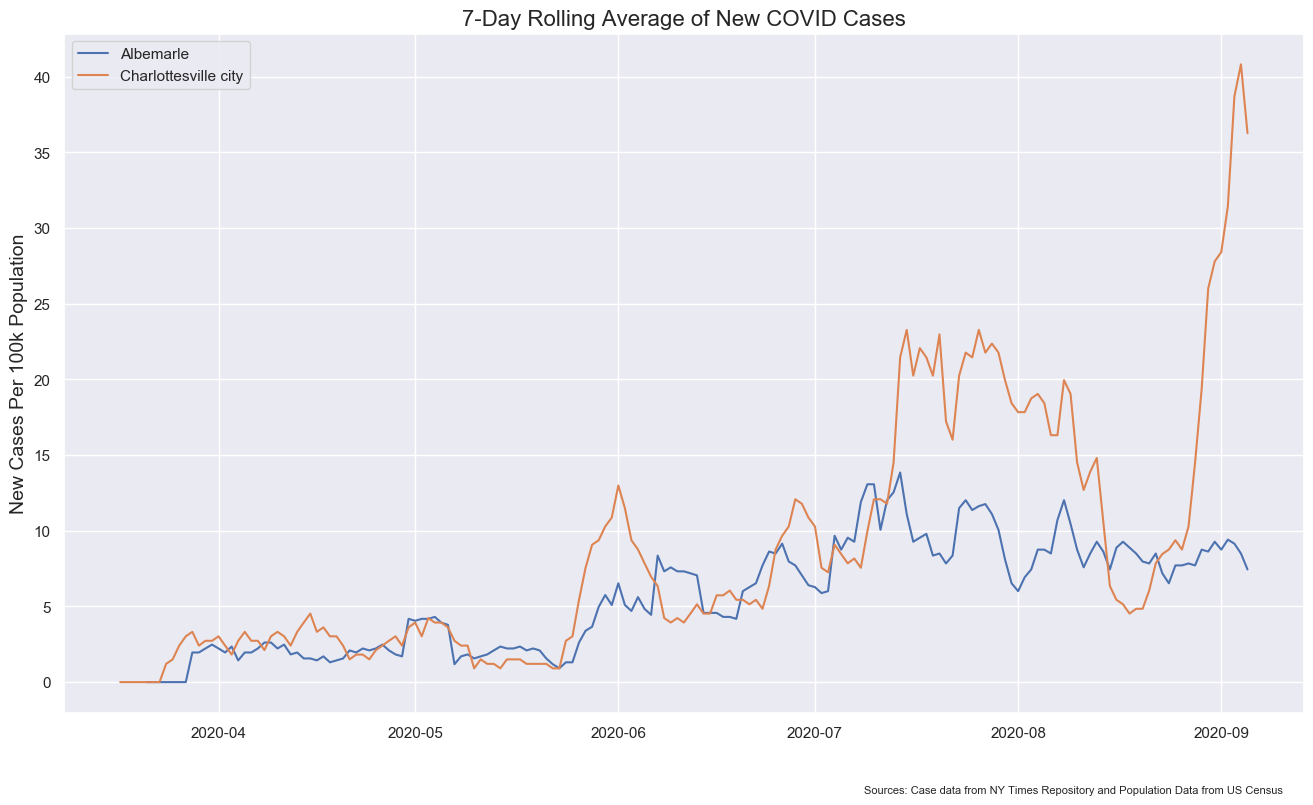

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')